In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [2]:
pitchLengthX=120
pitchWidthY=80

#ID for England vs Sweden Womens World Cup
match_id_required = 69301
home_team_required ="England Women's"
away_team_required ="Sweden Women's"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
import json
with open('StatsBombData/data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)


In [5]:
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

/tmp/ipykernel_4218/184074869.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])


In [41]:
print(df.shape)
for i in df.columns:
    print(i)

(3291, 120)
id
index
period
timestamp
minute
second
possession
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_body_part_id
pass_body_part_name
pass_type_id
pass_type_name
under_pressure
carry_end_location
pass_outcome_id
pass_outcome_name
ball_receipt_outcome_id
ball_receipt_outcome_name
out
clearance_body_part_id
clearance_body_part_name
clearance_left_foot
duel_type_id
duel_type_name
duel_outcome_id
duel_outcome_name
counterpress
pass_deflected
dribble_outcome_id
dribble_outcome_name
pass_switch
interception_outcome_id
interception_outcome_name
pass_technique_id
pass_technique_name
pass_inswinging
clearance_head
pass_cross
goalkeeper_type_id
goalkeeper_type_name
goalkeeper_outcome_id
goalkeeper_o

In [35]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Ball Recovery', 'Clearance', 'Block', 'Dispossessed',
       'Duel', 'Dribbled Past', 'Dribble', 'Interception', 'Goal Keeper',
       'Miscontrol', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Error', 'Shot', 'Substitution', 'Half End', 'Tactical Shift',
       'Bad Behaviour'], dtype=object)

In [12]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
shots[1:5]

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_straight,block_save_block,foul_committed_advantage,foul_won_advantage,foul_committed_card_id,foul_committed_card_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
de5c41c5-9200-439e-b051-bfe2016d689a,531,1,00:15:28.174,15,28,25,0.472900,16,Shot,858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
106faebb-00bc-4453-b1c1-1bacdb1ebbc5,720,1,00:21:08.216,21,8,35,1.254112,16,Shot,858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
309f6f06-3977-49ac-8c0b-0e31b54404ed,742,1,00:22:46.449,22,46,37,1.118733,16,Shot,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301
d1c8dbc7-a164-4e34-8674-1eeba842cbbd,956,1,00:30:38.174,30,38,52,1.359400,16,Shot,865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69301


104.7 45.5
110.9 53.1
107.8 26.1
93.7 51.1
108.0 52.7
83.6 47.1
105.4 25.5
108.4 53.3
84.3 31.3
81.9 35.2
88.6 39.9
117.5 48.2
63.1 79.4
95.7 39.3
82.9 38.3
102.9 51.5
107.0 37.7
89.3 33.5
109.0 33.4


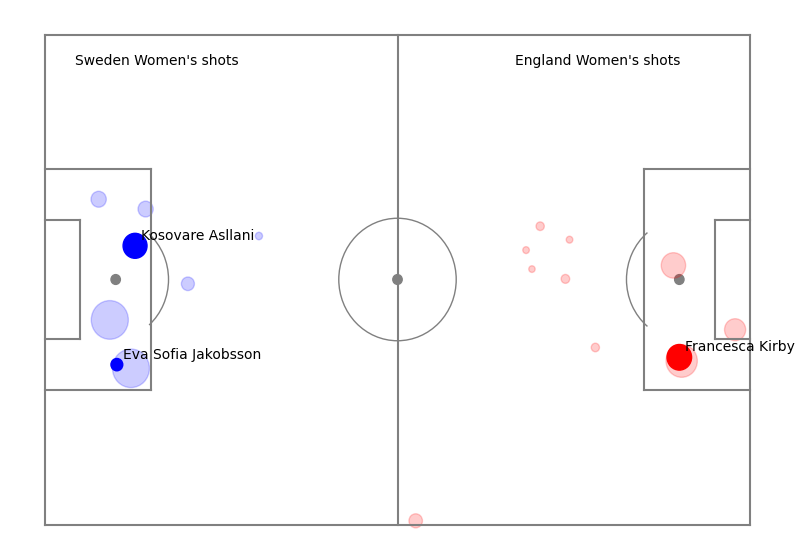

In [31]:
#Plot the shots
#iterating through each row
#shot = row
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    print(x,y)
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
    circleSize=2
    #this looks at size propportional to xG
    circleSize=np.sqrt(shot['shot_statsbomb_xg'])*6
    #in order to get the right coordinates for the shot
    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name'])
        
        
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
    
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
#fig.savefig('Output/shots.pdf', dpi=100) 
plt.show()


In [74]:
#dataframe of passess
#A dataframe of shots
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')
passes.shape

SyntaxError: '[' was never closed (2350128097.py, line 3)

In [75]:
print(passes['pass_goal_assist'].unique())

[nan True]


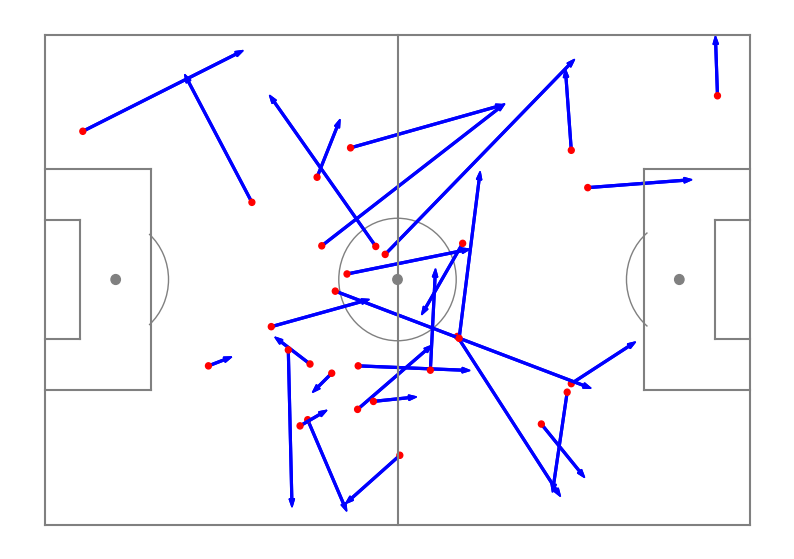

In [76]:
#plot the passesof swedish team
#iterating through each row
#shot = row
"""
pass_length
pass_angle
pass_end_location
pass_type_id
pass_type_name
pass_outcome_id
pass_outcome_name
pass_assisted_shot_id
pass_shot_assist
pass_through_ball
pass_goal_assist
pass_cross
"""
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,pas in passes.iterrows():
    x0=pas['location'][0]
    y0=pas['location'][1]
    x1=pas['pass_end_location'][0]
    y1=pas['pass_end_location'][1]
    dx = (x1-x0)
    dy = (y1-y0)
    
    
    
    #bools
    cross=pas['pass_cross'] == 'True'
    goal_assist = pas['pass_goal_assist'] == 'True'
    shot_assist = pas['pass_shot_assist'] == 'True'
    team_name=pas['team_name']
    player= pas['player_name'] == 'Sara Caroline Seger'
    circleSize=0.5
    #this looks at size propportional to xG
    #circleSize=np.sqrt(shot['shot_statsbomb_xg'])*6
    #in order to get the right coordinates for the shot
    if (player):
        passCircle= plt.Circle((x0,y0),circleSize,color="red")
        passArrow = plt.arrow(x0,y0,dx,dy, width = 0.3,color='blue')
    else:
        continue
    
    ax.add_patch(passArrow)
    ax.add_patch(passCircle)
    
    
#lt.text(5,75,away_team_required + ' shots') 
#lt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
#fig.savefig('Output/shots.pdf', dpi=100) 
plt.show()


In [91]:
for i in passes['pass_cross']:
    if i == True:
        print(i)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


328fd982-6463-47a4-aad8-3153f0138bb8
708c1363-bc26-41e5-b918-bc1304b291f6


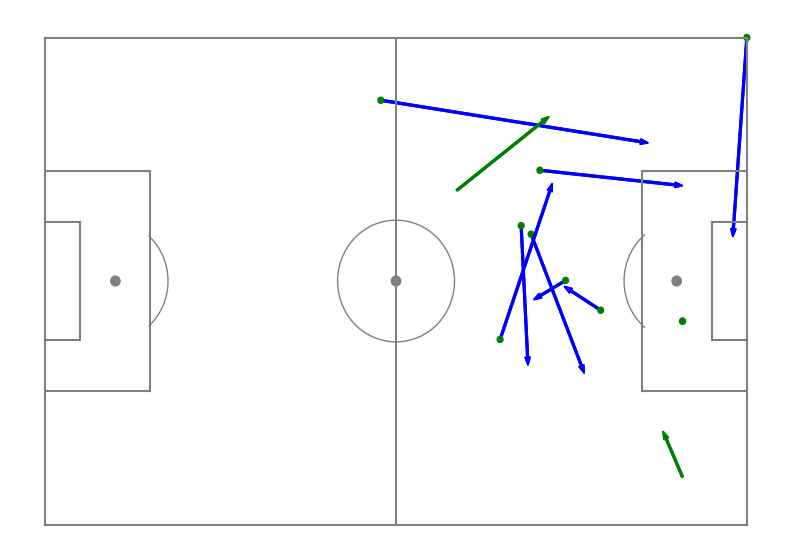

In [118]:
#plot the passesof swedish team
#iterating through each row
#shot = row
"""
pass_length
pass_angle
pass_end_location
pass_type_id
pass_type_name
pass_outcome_id
pass_outcome_name
pass_assisted_shot_id
pass_shot_assist
pass_through_ball
pass_goal_assist
pass_cross
"""
#Draw the pitch
from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,pas in passes.iterrows():
    x0=pas['location'][0]
    y0=pas['location'][1]
    x1=pas['pass_end_location'][0]
    y1=pas['pass_end_location'][1]
    dx = (x1-x0)
    dy = (y1-y0)
    
    
    
    #bools
    cross=pas['pass_cross'] == True
    goal_assist = pas['pass_goal_assist'] == True
    shot_assist = pas['pass_shot_assist'] == True
    team_name=pas['team_name']
    player= pas['player_name'] == 'Sara Caroline Seger'
    circleSize=0.5
    #this looks at size propportional to xG
    #if (pas['shot_statsbomb_xg']!='nan')
    #arrowSize=np.sqrt(pas['shot_statsbomb_xg'])*12
    arrowSize = 0.3
    #in order to get the right coordinates for the shot
    #if team_name == away_team_required:
    if True:
        if goal_assist:
            print(i)
            passCircle= plt.Circle((x,y),circleSize,color="green")
            passArrow = plt.arrow(x0,y0,dx,dy, width = arrowSize,color='green')
            if cross:
                plt.text(x+1,y+1,"cross") 
            
        elif (shot_assist):
            passCircle= plt.Circle((x0,y0),circleSize,color="green")
            passArrow = plt.arrow(x0,y0,dx,dy,  width = arrowSize,color='blue')
            if cross:
                plt.text(x0+1,y0+1,"cross")
        else:
            continue
    else:
        continue
    
    ax.add_patch(passArrow)
    ax.add_patch(passCircle)
    
    
    
#lt.text(5,75,away_team_required + ' shots') 
#lt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
#fig.savefig('Output/shots.pdf', dpi=100) 
plt.show()


In [100]:
passes.loc['708c1363-bc26-41e5-b918-bc1304b291f6'
,:]

index                                949
period                                 1
timestamp                   00:30:32.708
minute                                30
second                                32
                                ...     
foul_committed_advantage             NaN
foul_won_advantage                   NaN
foul_committed_card_id               NaN
foul_committed_card_name             NaN
match_id                           69301
Name: 708c1363-bc26-41e5-b918-bc1304b291f6, Length: 119, dtype: object

In [117]:
df.loc[df['minute']==30,['type_name','shot_outcome_name']]

,type_name,shot_outcome_name
919,Ball Receipt*,NaN
920,Carry,NaN
921,Pass,NaN
922,Ball Receipt*,NaN
923,Duel,NaN
924,Miscontrol,NaN
925,Ball Recovery,NaN
926,Carry,NaN
927,Pass,NaN
928,Ball Receipt*,NaN
